In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
root_dir = './mpi_inf_3dhp';

def isS(s):
    return s.startswith("S")

def sToInt (s):
    return int(s.split("S")[-1])
sids = sorted(list(filter(isS, os.listdir(root_dir))))
sids  = list(map(sToInt, sids))
print(sids)

scaler = 368 / 2048;

[1, 2, 3, 4, 5, 6, 7, 8]


In [3]:
print('convert annotation data to pandas DataFrame in %s' % root_dir)
dfs = []
for sid in sids:
    for s in [1,2]:
        file =  '%s/S%d/Seq%d/annot.mat' % (root_dir, sid, s)
        print('loading %s' % file)
        mat = sio.loadmat(file)
        df = pd.DataFrame(mat["frames"])
        df.columns = ["Frame"]
        df["SId"] = sid
        df["Seq"] = s
        for c in mat["cameras"][0]:
            videoFile = '%s/S%d/Seq%d/imageSequence/video_%i.avi' % (root_dir, sid, s, c)
            if(os.path.exists(videoFile)):
                df["annot2_%i" % c] = mat["annot2"][c][0].tolist()
                df["annot3_%i" % c] = mat["annot3"][c][0].tolist()
                df["univ_annot3_%i" % c] = mat["univ_annot3"][c][0].tolist()
        dfs.append(df)

convert annotation data to pandas DataFrame in ./mpi_inf_3dhp
loading ./mpi_inf_3dhp/S1/Seq1/annot.mat
loading ./mpi_inf_3dhp/S1/Seq2/annot.mat
loading ./mpi_inf_3dhp/S2/Seq1/annot.mat
loading ./mpi_inf_3dhp/S2/Seq2/annot.mat
loading ./mpi_inf_3dhp/S3/Seq1/annot.mat
loading ./mpi_inf_3dhp/S3/Seq2/annot.mat
loading ./mpi_inf_3dhp/S4/Seq1/annot.mat
loading ./mpi_inf_3dhp/S4/Seq2/annot.mat
loading ./mpi_inf_3dhp/S5/Seq1/annot.mat
loading ./mpi_inf_3dhp/S5/Seq2/annot.mat
loading ./mpi_inf_3dhp/S6/Seq1/annot.mat
loading ./mpi_inf_3dhp/S6/Seq2/annot.mat
loading ./mpi_inf_3dhp/S7/Seq1/annot.mat
loading ./mpi_inf_3dhp/S7/Seq2/annot.mat
loading ./mpi_inf_3dhp/S8/Seq1/annot.mat
loading ./mpi_inf_3dhp/S8/Seq2/annot.mat


In [4]:
df = pd.concat(dfs)

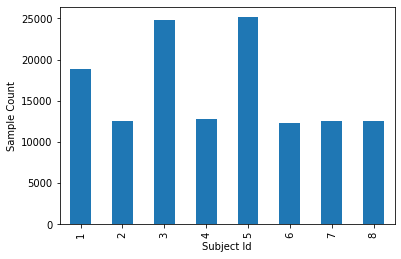

In [5]:
df.groupby("SId").count().Frame.plot(kind="bar")
plt.ylabel("Sample Count")
plt.xlabel("Subject Id")
plt.show()

In [ ]:
sid = 1
s = 1
c = 1
frame = 100
e = df[(df.SId == sid) & (df.Seq == s) & (df.Frame == frame)].iloc[0]

videoFile = '%s/S%d/Seq%d/imageSequence/video_%i.avi' % (root_dir, sid, s, c)
video = cv2.VideoCapture(videoFile)
video.set(cv2.CAP_PROP_POS_FRAMES, frame)
ret, imgSequence = video.read()
plt.imshow(cv2.cvtColor(imgSequence, cv2.COLOR_BGR2RGB))
plt.scatter(e["annot2_%i" % c][::2], e["annot2_%i" % c][1::2])

#videoFile = '%s/S%d/Seq%d/FGmasks/video_%i.avi' % (root_dir, sid, s, c)
#video = cv2.VideoCapture(videoFile)
#video.set(cv2.CAP_PROP_POS_FRAMES, frame)
#ret, imgFGmasks = video.read()

In [7]:
cams = sorted(list(filter(lambda x: x.startswith("univ_annot3_"), df.columns)))
cams  = list(map(lambda x: int(x.split("univ_annot3_")[-1]), cams))
cams

[0, 1, 2, 4, 5, 6, 7, 8]

In [8]:
dfs = []
for c in cams:
    dfX = df[["SId","Seq", "Frame", "univ_annot3_%i" % c]].copy(deep=True)
    dfX = dfX.rename(columns={"univ_annot3_%i" % c : "UnivAnnot3"})
    dfX["Camera"] = c
    dfs.append(dfX)
dfLong = pd.concat(dfs)
dfLong = dfLong.sort_values(["SId","Seq", "Frame", "Camera"])[["SId","Seq", "Frame", "Camera", "UnivAnnot3"]]

In [9]:
dfLong.to_pickle("./mpi_inf_3dhp/annot.pkl")